# Crop Recommendation System 

##### For the Final Project on Artifficial Intelligence

#### Submitted by: <br> BSatria Pangestu Adilamsyah

In [1]:
# Importing of libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df_crop = pd.read_csv('Dataset\Crop_recom')
df_crop

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\USER\AppData\Local\Temp\ipykernel_4404\3059873899.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_crop = pd.read_csv('Dataset\Crop_recom')


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df_crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
df_crop.shape
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## Exploratory Data Analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_4404\3788314192.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_crop[x], bins=20)
C:\Users\USER\AppData\Local\Temp\ipykernel_4404\3788314192.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_crop[x], bins=20)
C:\Users\USER\AppData\Local\Temp

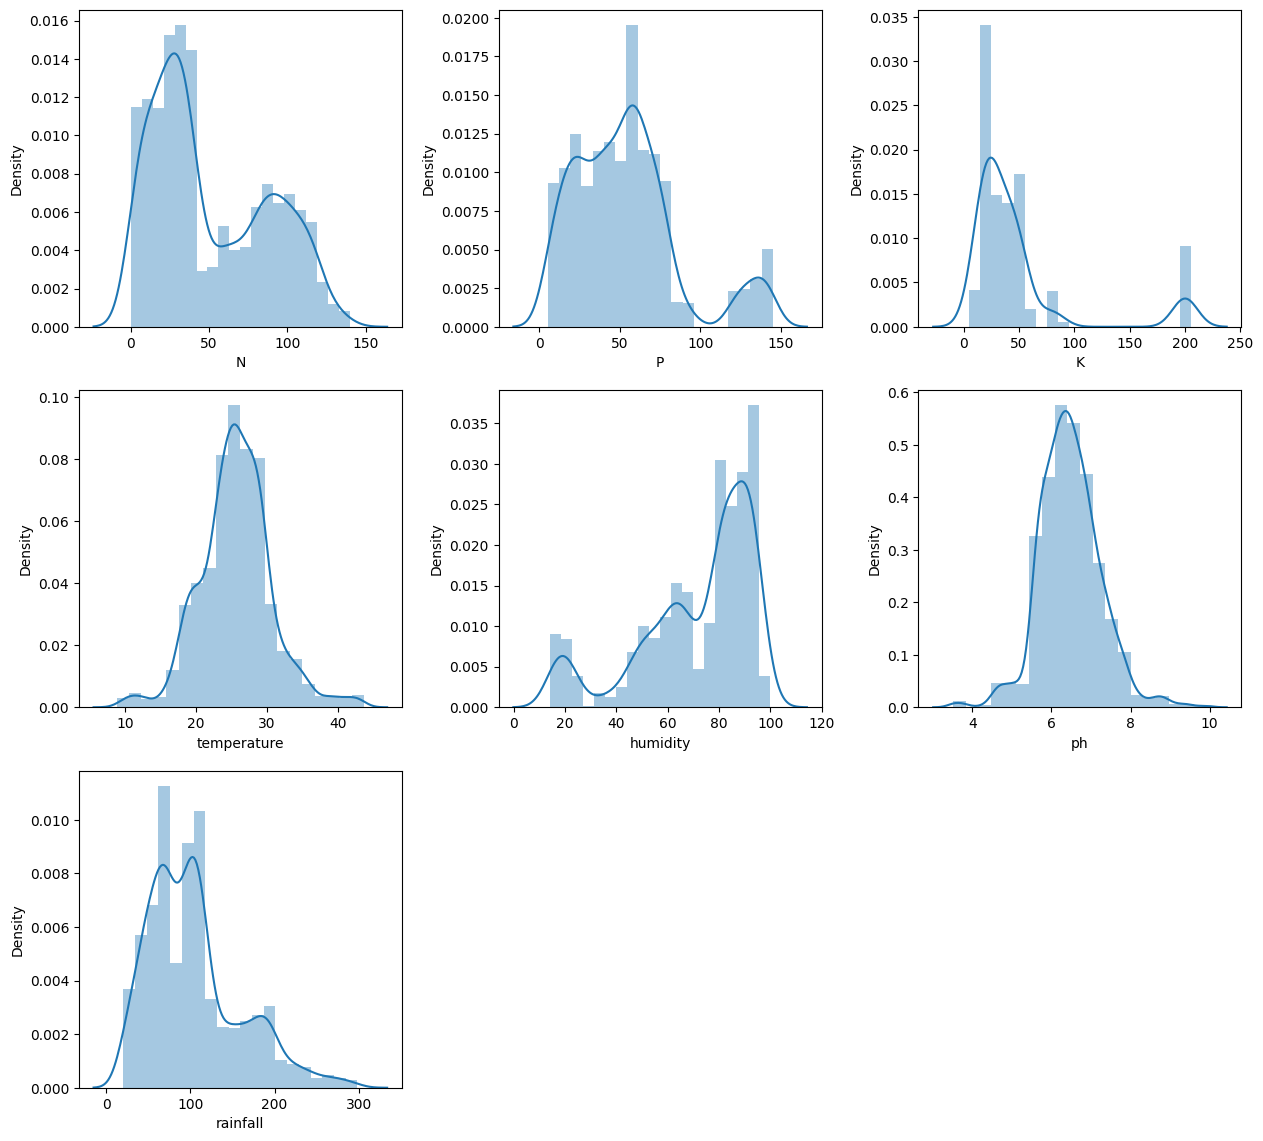

In [5]:
plt.figure(1, figsize=(15,14))
n = 0 
for x in ['N','P','K','temperature','humidity','ph','rainfall']:
    n += 1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace=0.2, wspace=0.3)
    sns.distplot(df_crop[x], bins=20)
plt.show()

In [6]:
def get_region(row):
  if  row['ph'] >= 5.5 and row['ph'] <= 7.0 and \
      row['temperature'] >= 25 and row['temperature'] <= 30 and \
      row['rainfall'] >= 150 and row['rainfall'] <= 300:
    return 'Java'
  elif row['ph'] >= 5.0 and row['ph'] <= 6.0 and \
       row['temperature'] >= 23 and row['temperature'] <= 28 and \
       row['rainfall'] >= 200 and row['rainfall'] <= 400:
    return 'Sumatra'
  elif row['ph'] >= 4.5 and row['ph'] <= 5.5 and \
       row['temperature'] >= 24 and row['temperature'] <= 29 and \
       row['rainfall'] >= 250 and row['rainfall'] <= 450:
    return 'Kalimantan'
  elif row['ph'] >= 5.2 and row['ph'] <= 7.2 and \
       row['temperature'] >= 25 and row['temperature'] <= 30 and \
       row['rainfall'] >= 100 and row['rainfall'] <= 200:
    return 'Sulawesi'
  elif row['ph'] >= 5.0 and row['ph'] <= 6.5 and \
       row['temperature'] >= 22 and row['temperature'] <= 27 and \
       row['rainfall'] >= 200 and row['rainfall'] <= 400:
    return 'Papua'
  else:
    return 'Other'

df_crop['region'] = df_crop.apply(get_region, axis=1)


In [7]:
df_crop = pd.get_dummies(df_crop, columns=['region'], prefix=['region'])
df_crop

,N,P,K,temperature,humidity,ph,rainfall,label,region_Java,region_Other,region_Papua,region_Sulawesi,region_Sumatra
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,False,True,False,False,False
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,False,True,False,False,False
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,False,True,False,False,False
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,True,False,False,False,False
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,True,False,False,False,False
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,False,False,False,True,False
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,False,True,False,False,False
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,False,False,False,True,False


## Data Splitting

In [8]:
X = df_crop.drop(['label'], axis=1)
y = df_crop['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Variables for Accuracy and Models
acc = []
model = []

## Random Forests

In [10]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, max_depth=None)
RandomForest.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy * 100)
acc.append(accuracy)
model.append('Random Forest')

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

Accuracy: 99.31818181818181
Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      

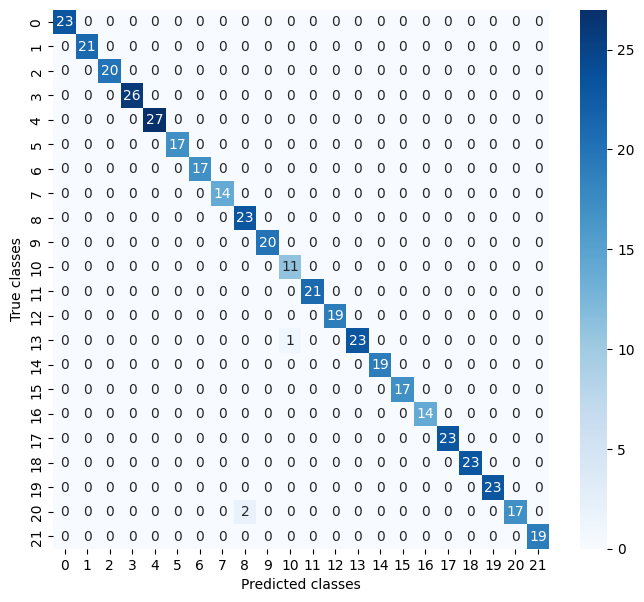

In [11]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted classes, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

In [12]:
# Experiment 1
RandomForest = RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42, max_depth=5)
RandomForest.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy * 100)

Accuracy: 99.0909090909091


## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

DecisonTree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None)
DecisonTree.fit(X_train, y_train)

y_pred = DecisonTree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy * 100)
acc.append(accuracy)
model.append('Decision Tree')

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

Accuracy: 98.86363636363636
Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      

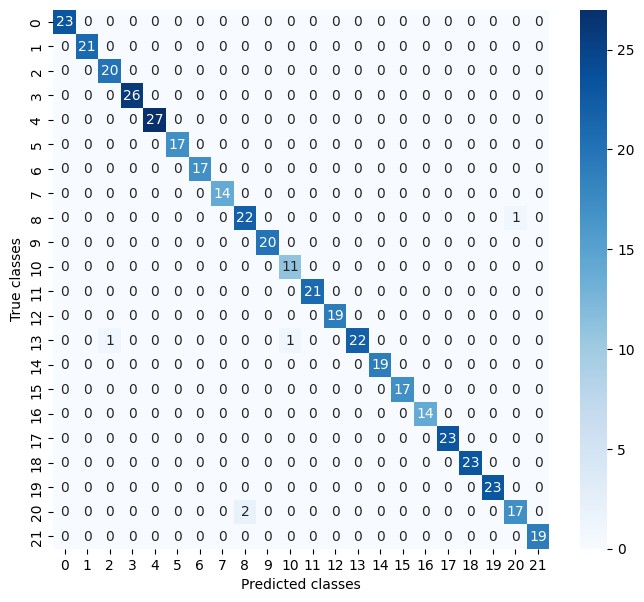

In [14]:
# Assuming y_test and y_pred are your true and predicted classes, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

In [15]:
# Experiment 1
DecisonTree = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5)
DecisonTree.fit(X_train, y_train)

y_pred = DecisonTree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy * 100)

Accuracy: 65.0


## Neural Network MLP Classifier

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Classifier = MLPClassifier(hidden_layer_sizes=(30, 20), activation="relu", 
                           max_iter=300, solver='adam', learning_rate='constant')
Classifier.fit(X_train_scaled, y_train)

y_pred = Classifier.predict(X_test_scaled)
nn_testing_acc = metrics.accuracy_score(y_test, y_pred)
# acc.append(testing_acc)
# model.append('MLPClassifier')
print("MLPClassifier Accuracy: ", nn_testing_acc*100)

acc.append(nn_testing_acc)
model.append('MLP Classifier')

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

MLPClassifier Accuracy:  95.22727272727273
Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.90      0.90        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.78      0.78      0.78        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange  

c:\Users\USER\Documents\Cropify-Crop-Recommendation-System\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


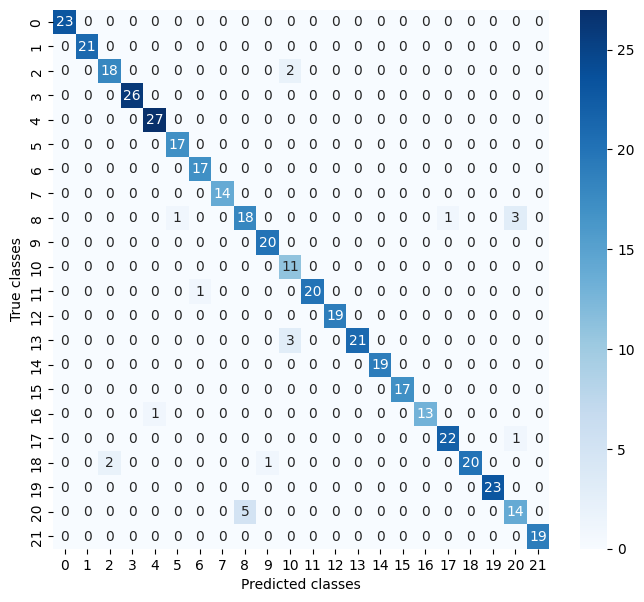

In [17]:
# Assuming y_test and y_pred are your true and predicted classes, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

In [18]:
# Experiment 1
Classifier = MLPClassifier(hidden_layer_sizes=(40, 30), activation="relu", 
                           max_iter=300, solver='sgd', learning_rate='adaptive')
Classifier.fit(X_train_scaled, y_train)

y_pred = Classifier.predict(X_test_scaled)
nn_testing_acc = metrics.accuracy_score(y_test, y_pred)
# acc.append(testing_acc)
# model.append('MLPClassifier')
print("MLPClassifier Accuracy: ", nn_testing_acc*100)


MLPClassifier Accuracy:  52.95454545454545


c:\Users\USER\Documents\Cropify-Crop-Recommendation-System\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22, weights='distance', algorithm='auto')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
knn_testing_acc = metrics.accuracy_score(y_test, y_pred)
# acc.append(testing_acc)
# model.append('K Nearest Neighbours')
print("KNN Accuracy: ", knn_testing_acc*100)

acc.append(knn_testing_acc)
model.append('KNN')

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

KNN Accuracy:  95.9090909090909
Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.85      1.00      0.92        17
      grapes       1.00      1.00      1.00        14
        jute       0.72      1.00      0.84        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00  

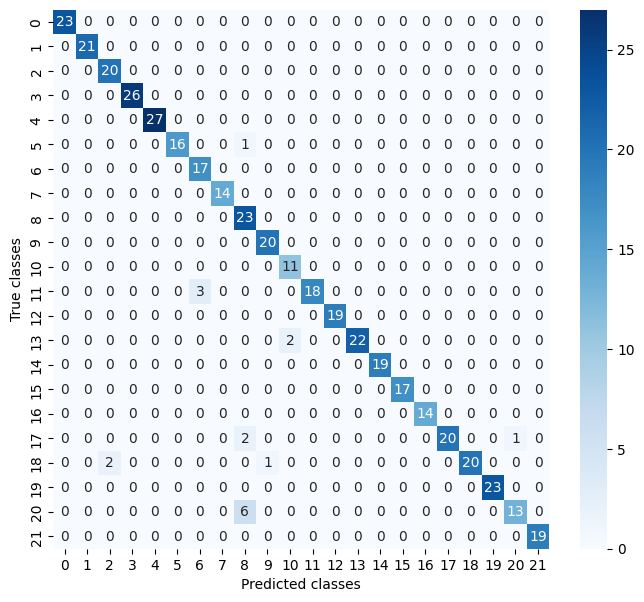

In [20]:
# Assuming y_test and y_pred are your true and predicted classes, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=22, weights='uniform', algorithm='kd_tree')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
knn_testing_acc = metrics.accuracy_score(y_test, y_pred)
print("KNN Accuracy: ", knn_testing_acc*100)


KNN Accuracy:  95.68181818181817


## Test Algorithm

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

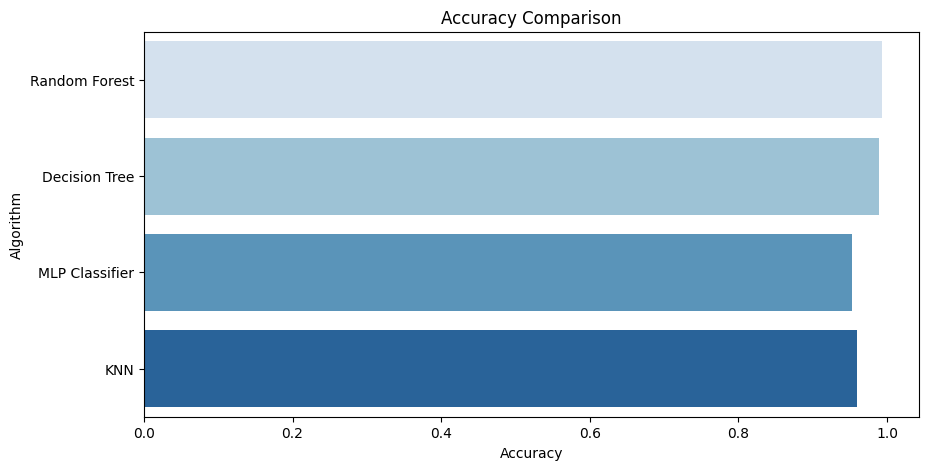

In [22]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model, palette='Blues')

In [23]:
import numpy as np
test_rc = np.array([[107,34,32,26.774637,66.413269,6.780064,177.774507,0,0,0,0,1]])
print(test_rc)

[[107.        34.        32.        26.774637  66.413269   6.780064
  177.774507   0.         0.         0.         0.         1.      ]]


### Test Algorithm

In [24]:
y_pred_1 = RandomForest.predict(test_rc)
print(y_pred_1)

['coffee']


c:\Users\USER\Documents\Cropify-Crop-Recommendation-System\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Deploy Model

In [25]:
from joblib import Parallel, delayed
import joblib


joblib.dump(RandomForest, 'RDF_model.hdf5')

['RDF_model.hdf5']